In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [81]:
from fastai.structured import *
from fastai.column_data import *
import pandas as pd
np.set_printoptions(threshold=50, edgeitems=20)

PATH = 'fixed/data/'

In [82]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [83]:
df=pd.read_pickle('df_fixed_normalized.pkl')

In [84]:
from sklearn.utils import shuffle
df = shuffle(df)

In [85]:
df.head(20)

,atom_number,atom_name,residue_name,chain_id,residue_number,x_coord,y_coord,z_coord,b_factor,element_symbol,x_ca,y_ca,z_ca
522,523,CD2,TYR,213,69,1.224306,-0.602414,1.019632,0.0,C,1.357141,1.357141,1.357141
826,827,CB,TRP,226,109,0.542446,-0.272088,1.297469,0.0,C,0.626296,0.626296,0.626296
1347,1348,HA,GLN,258,88,-0.514820,-0.648300,0.822543,0.0,H,0.359035,0.359035,0.359035
365,366,CB,LEU,44,45,-1.170406,-0.203058,-0.114062,0.0,C,0.603184,0.603184,0.603184
589,590,C,GLU,168,74,-1.486810,-0.403873,-1.575621,0.0,C,1.853668,1.853668,1.853668
849,850,CG1,ILE,10,109,0.328344,0.973116,0.428926,0.0,C,0.313406,0.747207,0.363194
1404,1405,OD2,ASP,241,181,-0.366901,0.302827,-0.961516,0.0,O,-0.613996,-0.613996,-0.613996
858,859,CD1,LEU,234,100,-0.978469,0.214634,-1.213377,0.0,C,-0.877883,-0.877883,-0.877883
47,48,O,ASN,168,6,-1.054529,1.465414,0.138000,0.0,O,0.338014,0.338014,0.338014
7,8,CD2,LEU,92,1,0.733400,1.186181,0.868856,0.0,C,1.944728,1.944728,1.944728


In [86]:
df.columns

Index(['atom_number', 'atom_name', 'residue_name', 'chain_id',
       'residue_number', 'x_coord', 'y_coord', 'z_coord', 'b_factor',
       'element_symbol', 'x_ca', 'y_ca', 'z_ca'],
      dtype='object')

In [87]:
cat_vars = ['atom_name', 'residue_name', 'chain_id',
       'residue_number','element_symbol']

In [88]:
contin_vars = ['x_coord', 'y_coord', 'z_coord','x_ca', 'y_ca', 'z_ca']

In [89]:
for v in cat_vars: df[v] = df[v].astype('category').cat.as_ordered()

In [90]:
for v in contin_vars:
    df[v] = df[v].fillna(0).astype('float32')

In [91]:
df.columns

Index(['atom_number', 'atom_name', 'residue_name', 'chain_id',
       'residue_number', 'x_coord', 'y_coord', 'z_coord', 'b_factor',
       'element_symbol', 'x_ca', 'y_ca', 'z_ca'],
      dtype='object')

In [94]:
y=df.drop(['atom_name', 'residue_name', 'chain_id', 'residue_number','b_factor', 'atom_number','element_symbol', 'x_ca', 'y_ca', 'z_ca'],axis=1)
y.head()

,x_coord,y_coord,z_coord
522,1.224306,-0.602414,1.019632
826,0.542446,-0.272088,1.297469
1347,-0.514820,-0.648300,0.822543
365,-1.170406,-0.203058,-0.114062
589,-1.486810,-0.403873,-1.575621


In [93]:
y=y.values

In [14]:
train_cats(df)

In [15]:
df.head()

,atom_number,atom_name,residue_name,chain_id,residue_number,x_coord,y_coord,z_coord,b_factor,element_symbol,x_ca,y_ca,z_ca
0,1,N,ALA,1,1,1.907654,0.193423,1.923157,0.0,N,1.965435,0.27522,1.959391
1,2,CA,ALA,1,1,1.965435,0.275220,1.959391,0.0,C,1.965435,0.27522,1.959391
2,3,C,ALA,1,1,1.911002,0.365770,1.927624,0.0,C,1.965435,0.27522,1.959391
3,4,O,ALA,1,1,1.840849,0.364930,1.851682,0.0,O,1.965435,0.27522,1.959391
4,5,CB,ALA,1,1,2.061931,0.273539,1.885633,0.0,C,1.965435,0.27522,1.959391


In [16]:
df=df.drop(['x_coord','y_coord', 'z_coord'],axis=1)
df.head(10)

,atom_number,atom_name,residue_name,chain_id,residue_number,b_factor,element_symbol,x_ca,y_ca,z_ca
0,1,N,ALA,1,1,0.0,N,1.965435,0.275220,1.959391
1,2,CA,ALA,1,1,0.0,C,1.965435,0.275220,1.959391
2,3,C,ALA,1,1,0.0,C,1.965435,0.275220,1.959391
3,4,O,ALA,1,1,0.0,O,1.965435,0.275220,1.959391
4,5,CB,ALA,1,1,0.0,C,1.965435,0.275220,1.959391
5,6,N,LYS,1,2,0.0,N,1.907581,0.536296,1.951052
6,7,CA,LYS,1,2,0.0,C,1.907581,0.536296,1.951052
7,8,C,LYS,1,2,0.0,C,1.907581,0.536296,1.951052
8,9,O,LYS,1,2,0.0,O,1.907581,0.536296,1.951052
9,10,CB,LYS,1,2,0.0,C,1.907581,0.536296,1.951052


In [17]:
df=df.drop(['atom_number'],axis=1)
df.head()

,atom_name,residue_name,chain_id,residue_number,b_factor,element_symbol,x_ca,y_ca,z_ca
0,N,ALA,1,1,0.0,N,1.965435,0.27522,1.959391
1,CA,ALA,1,1,0.0,C,1.965435,0.27522,1.959391
2,C,ALA,1,1,0.0,C,1.965435,0.27522,1.959391
3,O,ALA,1,1,0.0,O,1.965435,0.27522,1.959391
4,CB,ALA,1,1,0.0,C,1.965435,0.27522,1.959391


In [30]:
df1, d, nas, mapper = proc_df(df, 'b_factor', do_scale=True)

In [31]:
# train_ratio = 0.75
train_ratio = 0.9
train_size = int(len(df1) * train_ratio); train_size
val_idx = list(range(train_size, len(df1)))

In [32]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df1, y.astype(np.float32), cat_flds=cat_vars, bs=64)

In [33]:
cat_sz = [(c, len(df[c].cat.categories)+1) for c in cat_vars]

In [34]:
cat_sz

[('atom_name', 83),
 ('residue_name', 21),
 ('chain_id', 270),
 ('residue_number', 558),
 ('element_symbol', 6)]

In [35]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [36]:
len(df.columns)-len(cat_vars)

4

In [29]:
class MixedInputModel(nn.Module):
    def __init__(self, emb_szs, n_cont, emb_drop, out_sz, szs, drops,
                 y_range=None, use_bn=False, is_reg=True, is_multi=False):
        super().__init__()
        self.embs = nn.ModuleList([nn.Embedding(c, s) for c,s in emb_szs])
        for emb in self.embs: emb_init(emb)
        n_emb = sum(e.embedding_dim for e in self.embs)
        self.n_emb, self.n_cont=n_emb, n_cont
        
        szs = [n_emb+n_cont] + szs
        self.lins = nn.ModuleList([
            nn.Linear(szs[i], szs[i+1]) for i in range(len(szs)-1)])
        self.bns = nn.ModuleList([
            nn.BatchNorm1d(sz) for sz in szs[1:]])
        for o in self.lins: kaiming_normal(o.weight.data)
        self.outp = nn.Linear(szs[-1], out_sz)
        kaiming_normal(self.outp.weight.data)

        self.emb_drop = nn.Dropout(emb_drop)
        self.drops = nn.ModuleList([nn.Dropout(drop) for drop in drops])
        self.bn = nn.BatchNorm1d(n_cont)
        self.use_bn,self.y_range = use_bn,y_range
        self.is_reg = is_reg
        self.is_multi = is_multi

    def forward(self, x_cat, x_cont):
        x = [e(x_cat[:,i]) for i,e in enumerate(self.embs)]
        x = torch.cat(x, 1)
        x2 = self.bn(x_cont)
        x = self.emb_drop(x)
        x = torch.cat([x, x2], 1)
        for l,d,b in zip(self.lins, self.drops, self.bns):
            x = F.relu(l(x)+x)
            if self.use_bn: x = b(x)
            x = d(x)
        x = self.outp(x)
        if self.y_range:
            x = F.sigmoid(x)
            x = x*(self.y_range[1] - self.y_range[0])
            x = x+self.y_range[0]
        return x

In [30]:
MixedInputModel??

In [37]:
m = md.get_learner(emb_szs, 3,0.2, 3, [1000,500], [0.01,0.01],use_bn=True)

In [32]:
from .torch_core import *

ModuleNotFoundError: No module named '__main__.torch_core'; '__main__' is not a package

In [33]:
class FlattendLoss():
    def __init__(self,func,*args,axis:int=-1 ,floatify:bool=False , is_2d:bool=True ,**kwargs):
        self.func,self.axis,self.floatify,self.is_2d = func(*args,**kwargs),axis,floatify,is_2d
    @property
    def reduction(self): return self.func.reduction
    @reduction.setter
    def reduction(self,v): self.func.reduction = v 
    def __call__(self, input:Tensor , target:Tensor , **kwargs)->Rank0Tensor :
        input= input.transpose(self.axis,-1).contiguose()
        target= target.transpose(self.axis,-1).contiguose()
        if self.floatify: target = target.float()
        input = input.view(-1,input.shape[-1]) if self.is_2d else input.view(-1)
        return self.func.__call__(input,target.view(-1),**kwargs)
    

NameError: name 'Tensor' is not defined

ModuleNotFoundError: No module named 'F'

In [38]:
def mse_los(input, target, size_average=True, reduce=True):
    input = input.view(-1)
    target = target.view(-1)
    return F._pointwise_loss(lambda a, b: (a - b) ** 2, torch._C._nn.mse_loss,
                           input, target, size_average, reduce)

In [39]:
m.crit = mse_los

In [29]:
m.lr_find()

 60%|██████    | 2969/4922 [00:22<00:15, 128.47it/s, loss=4.96] 

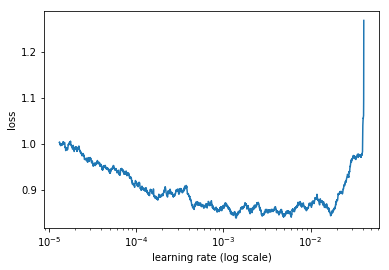

In [30]:
m.sched.plot(100)

In [42]:
lr = 1e-3
wd = 0

In [43]:
m.fit(lr, 5, wds=wd, cycle_len=4)

epoch      trn_loss   val_loss                                   
    0      0.083897   0.062493  
    1      0.075734   0.064776                                   
    2      0.069279   0.060564                                   
    3      0.065036   0.059572                                   
    4      0.081591   0.097936                                   
    5      0.073078   0.098966                                   
    6      0.065846   0.096995                                   
    7      0.06304    0.095323                                   
    8      0.076598   0.137286                                   
    9      0.070893   0.137684                                   
    10     0.063886   0.136735                                   
    11     0.062086   0.134371                                   
    12     0.07824    0.174662                                   
    13     0.069252   0.177988                                   
    14     0.062183   0.171506             

[array([0.20182])]

In [33]:
m.save('m_norm_flat')

In [40]:
m.load('m_norm_flat')

In [87]:
m.save('m_ca_best')

In [38]:
m.load('m_ca_best')

RuntimeError: While copying the parameter named embs.2.weight, whose dimensions in the model are torch.Size([270, 50]) and whose dimensions in the checkpoint are torch.Size([275, 50]).

 61%|██████    | 3006/4922 [00:40<00:12, 155.40it/s, loss=128]

In [191]:
e = m.model
e.eval()

MixedInputModel(
  (embs): ModuleList(
    (0): Embedding(83, 42)
    (1): Embedding(21, 11)
    (2): Embedding(270, 50)
    (3): Embedding(558, 50)
    (4): Embedding(6, 3)
  )
  (lins): ModuleList(
    (0): Linear(in_features=159, out_features=1000, bias=True)
    (1): Linear(in_features=1000, out_features=500, bias=True)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True)
  )
  (outp): Linear(in_features=500, out_features=3, bias=True)
  (emb_drop): Dropout(p=0.2)
  (drops): ModuleList(
    (0): Dropout(p=0.01)
    (1): Dropout(p=0.01)
  )
  (bn): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True)
)

In [44]:
x,y = m.predict_with_targs()

In [45]:
x

array([[ 1.21484,  1.25817,  0.09745],
       [ 1.20372,  1.23972,  0.11013],
       [ 1.20713,  1.21077,  0.12782],
       [ 1.22302,  1.25836,  0.11927],
       [ 1.1761 ,  1.15885,  0.14238],
       [ 1.1992 ,  1.22346,  0.15799],
       [ 1.01053,  1.27045, -0.11865],
       [ 1.03868,  1.25156, -0.09031],
       [ 0.94019,  1.28865, -0.13373],
       [ 0.95001,  1.27376, -0.13667],
       [ 1.00504,  1.28069, -0.14066],
       [ 1.10543,  1.29517, -0.14897],
       [ 1.1737 ,  1.34271, -0.19474],
       [ 1.13565,  1.39912, -0.21664],
       [ 1.132  ,  1.44519, -0.22761],
       [ 0.88716,  1.35142,  0.08628],
       [ 0.95911,  1.3472 ,  0.16632],
       [ 0.98134,  1.33662,  0.18303],
       [ 0.97564,  1.32442,  0.21495],
       [ 0.96651,  1.35808,  0.16214],
       ...,
       [-1.1141 , -0.72   , -0.15422],
       [-1.14473, -0.75769, -0.18907],
       [-1.09498, -0.79884, -0.24147],
       [-1.13642, -0.89409, -0.38482],
       [-0.88127, -0.49243, -0.60213],
       [-0.92

In [46]:
y.shape

(35000, 1, 3)

In [47]:
y=y.reshape(35000,3)

In [48]:
y

array([[ 1.04989,  1.08441,  0.04691],
       [ 1.07579,  1.03179,  0.10127],
       [ 0.99628,  0.97699, -0.06202],
       [ 1.03011,  0.87156, -0.08994],
       [ 1.02405,  0.75607, -0.02966],
       [ 1.02533,  0.83499, -0.18858],
       [ 1.0622 ,  1.18623, -0.00032],
       [ 1.10764,  1.24407,  0.01058],
       [ 1.11549,  1.28671,  0.10766],
       [ 1.15228,  1.26335,  0.14568],
       [ 1.11379,  1.35671, -0.05327],
       [ 1.16117,  1.41959, -0.0456 ],
       [ 1.16854,  1.52426, -0.1143 ],
       [ 1.13461,  1.56263, -0.1585 ],
       [ 1.20841,  1.56814, -0.12426],
       [ 1.08101,  1.34845,  0.14783],
       [ 1.08509,  1.39195,  0.24068],
       [ 1.09356,  1.28253,  0.30608],
       [ 1.12296,  1.29175,  0.36583],
       [ 1.04176,  1.46565,  0.26907],
       ...,
       [-0.96923, -0.7542 , -0.49805],
       [-1.08528, -0.835  , -0.60498],
       [-1.20433, -0.72192, -0.64948],
       [-1.32298, -0.77139, -0.67603],
       [-1.17265, -0.5695 , -0.65724],
       [-1.27

In [197]:
distance = y-x

In [198]:
distance_abs = abs(distance)

In [199]:
distance_abs.mean()

0.21051328

/home/b/anaconda3/envs/fastai/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


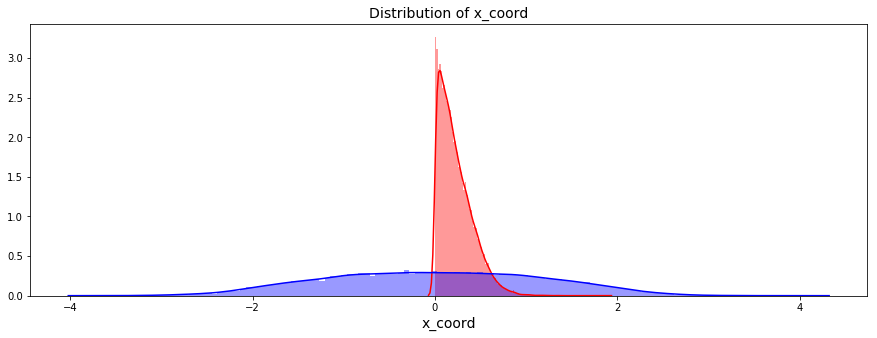

In [170]:
plt.figure(figsize=(15,5))
sns.distplot(abs(y[:,0]-x[:,0]), bins=120, color="r")
sns.distplot(x[:,0], bins=120, color="b")
plt.xlabel('x_coord', fontsize=14);
plt.title("Distribution of x_coord", fontsize=14);
plt.show();

/home/b/anaconda3/envs/fastai/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


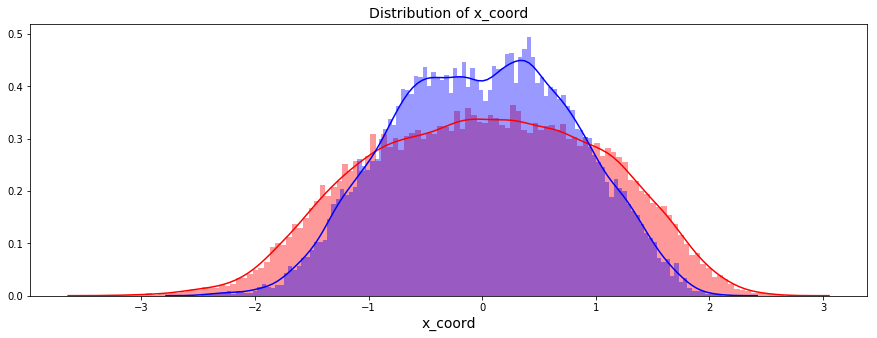

In [49]:
plt.figure(figsize=(15,5))
sns.distplot(y[:,0], bins=120, color="r")
sns.distplot(x[:,0], bins=120, color="b")
plt.xlabel('x_coord', fontsize=14);
plt.title("Distribution of x_coord", fontsize=14);
plt.show();

In [50]:
cat_vars

['atom_name', 'residue_name', 'chain_id', 'residue_number', 'element_symbol']

In [51]:
df.columns

Index(['atom_name', 'residue_name', 'chain_id', 'residue_number', 'b_factor',
       'element_symbol', 'x_ca', 'y_ca', 'z_ca'],
      dtype='object')

In [52]:
df[df.columns[0]].cat.categories.values

array(['C', 'CA', 'CB', 'CD', 'CD1', 'CD2', 'CE', 'CE1', 'CE2', 'CE3', 'CG', 'CG1', 'CG2', 'CH2', 'CZ',
       'CZ2', 'CZ3', 'H', 'H2', 'H3', ..., 'N', 'ND1', 'ND2', 'NE', 'NE1', 'NE2', 'NH1', 'NH2', 'NZ', 'O',
       'OD1', 'OD2', 'OE1', 'OE2', 'OG', 'OG1', 'OH', 'OXT', 'SD', 'SG'], dtype=object)

In [53]:
# for i,j in enumerate(df[df.columns[0]].cat.categories.values):
#     print(i,j)

In [54]:
atom_name_dic = dict()
Embedding_matrix = to_np(next(m.get_layer_groups()[0][0].parameters()))
for id,atom_name in enumerate(df[df.columns[0]].cat.categories.values):
    atom_name_dic[atom_name] = Embedding_matrix[id]
    


In [55]:
residue_name_dic = dict()
Embedding_matrix = to_np(next(m.get_layer_groups()[0][1].parameters()))
for id,residue_name in enumerate(df[df.columns[1]].cat.categories.values):
    residue_name_dic[residue_name] = Embedding_matrix[id]

In [56]:
chain_id_dic = dict()
Embedding_matrix = to_np(next(m.get_layer_groups()[0][2].parameters()))
for id,chain_id in enumerate(df[df.columns[2]].cat.categories.values):
    chain_id_dic[chain_id] = Embedding_matrix[id]

In [57]:
residue_number_dic = dict()
Embedding_matrix = to_np(next(m.get_layer_groups()[0][3].parameters()))
for id,residue_number in enumerate(df[df.columns[3]].cat.categories.values):
    residue_number_dic[residue_number] = Embedding_matrix[id]

In [58]:
element_symbol_dic = dict()
Embedding_matrix = to_np(next(m.get_layer_groups()[0][4].parameters()))
for id,element_symbol in enumerate(df[df.columns[5]].cat.categories.values):
   element_symbol_dic[element_symbol] = Embedding_matrix[id]

In [59]:
df_emb = df.copy()

In [64]:
df_emb.atom_name=df_emb.atom_name.map(atom_name_dic)

In [66]:
df_emb.residue_name=df_emb.residue_name.map(residue_name_dic)

In [67]:
df_emb.residue_number=df_emb.residue_number.map(residue_number_dic)

In [68]:
df_emb.element_symbol=df_emb.element_symbol.map(element_symbol_dic)

In [69]:
df_emb.chain_id=df_emb.chain_id.map(chain_id_dic)

In [71]:
df_emb = df_emb.drop('b_factor',axis=1)

In [72]:
df_emb.head()

,atom_name,residue_name,chain_id,residue_number,element_symbol,x_ca,y_ca,z_ca
0,"[-0.44631913, -0.016297048, 0.057964608, -0.03...","[0.13174935, 0.04393314, -0.15157786, -0.03139...","[0.0054658055, 0.022072993, 0.023494486, -0.01...","[0.0017315038, -0.00016357377, -0.023701893, 0...","[0.17381132, -0.26806852, 0.17100368]",1.965435,0.27522,1.959391
1,"[0.0036908044, 0.08505838, -0.07933746, -0.008...","[0.13174935, 0.04393314, -0.15157786, -0.03139...","[0.0054658055, 0.022072993, 0.023494486, -0.01...","[0.0017315038, -0.00016357377, -0.023701893, 0...","[-0.38824987, -0.4661128, 0.38692296]",1.965435,0.27522,1.959391
2,"[0.020546645, 0.019395143, 0.011817738, 0.0322...","[0.13174935, 0.04393314, -0.15157786, -0.03139...","[0.0054658055, 0.022072993, 0.023494486, -0.01...","[0.0017315038, -0.00016357377, -0.023701893, 0...","[-0.38824987, -0.4661128, 0.38692296]",1.965435,0.27522,1.959391
3,"[-0.20352036, -0.009803537, -0.051050935, 0.11...","[0.13174935, 0.04393314, -0.15157786, -0.03139...","[0.0054658055, 0.022072993, 0.023494486, -0.01...","[0.0017315038, -0.00016357377, -0.023701893, 0...","[0.060258996, -0.046780318, 0.06330776]",1.965435,0.27522,1.959391
4,"[-0.049599517, 0.077045836, -0.09362581, 0.055...","[0.13174935, 0.04393314, -0.15157786, -0.03139...","[0.0054658055, 0.022072993, 0.023494486, -0.01...","[0.0017315038, -0.00016357377, -0.023701893, 0...","[-0.38824987, -0.4661128, 0.38692296]",1.965435,0.27522,1.959391


In [79]:
df_emb.to_pickle('emb.pkl')

In [95]:
y_df = pd.DataFrame(y)

In [96]:
y_df.to_pickle('y.pkl')

In [62]:
Embedding_matrix = to_np(next(m.get_layer_groups()[0][0].parameters()))

In [63]:
Embedding_matrix.shape

(83, 42)

In [99]:
def idx2EmbPlot(idx,perplexity=30,early_exaggeration=12.0, learning_rate=200.0,ax=None):
    Embedding_matrix = to_np(next(m.get_layer_groups()[0][idx].parameters()))
    from sklearn.manifold import TSNE
    X_embedded = TSNE(n_components=2, perplexity=perplexity, early_exaggeration=early_exaggeration, 
                      learning_rate=learning_rate,n_iter=1000, n_iter_without_progress=300, 
                      min_grad_norm=1e-07,metric='euclidean', init='random', verbose=0, 
                      random_state=42, method='barnes_hut', angle=0.5).fit_transform(Embedding_matrix)
    
    annotation = np.append(df[df.columns[idx]].cat.categories.values,"Other")
    
    
    ax.scatter(X_embedded[:,0],X_embedded[:,1],c=range(len(annotation)),alpha=0.4)
    for xy,target in zip(X_embedded,annotation):
        if isinstance(target,np.str_) or isinstance(target,str):
            text = target
        else:
            text = "%d" % target
        ax.annotate(target,xy=(xy[0],xy[1]))
        ax.set_title(df.columns[idx])

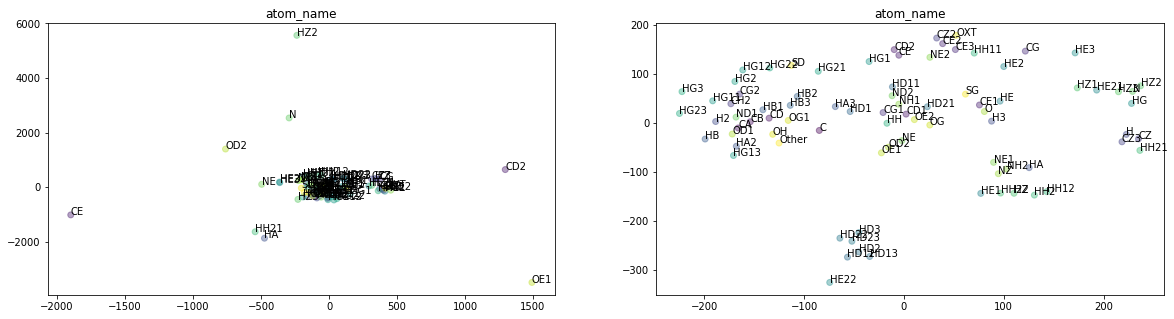

In [100]:
Perplexities = [2,4]

fig, axes = plt.subplots(nrows=1,ncols=len(Perplexities))
fig.set_figheight(5)
fig.set_figwidth(20)
for i,per in enumerate(Perplexities):
    idx2EmbPlot(0,per,ax=axes[i])